<a href="https://colab.research.google.com/github/AhmadAlsaadi/Desalination/blob/master/SSF_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

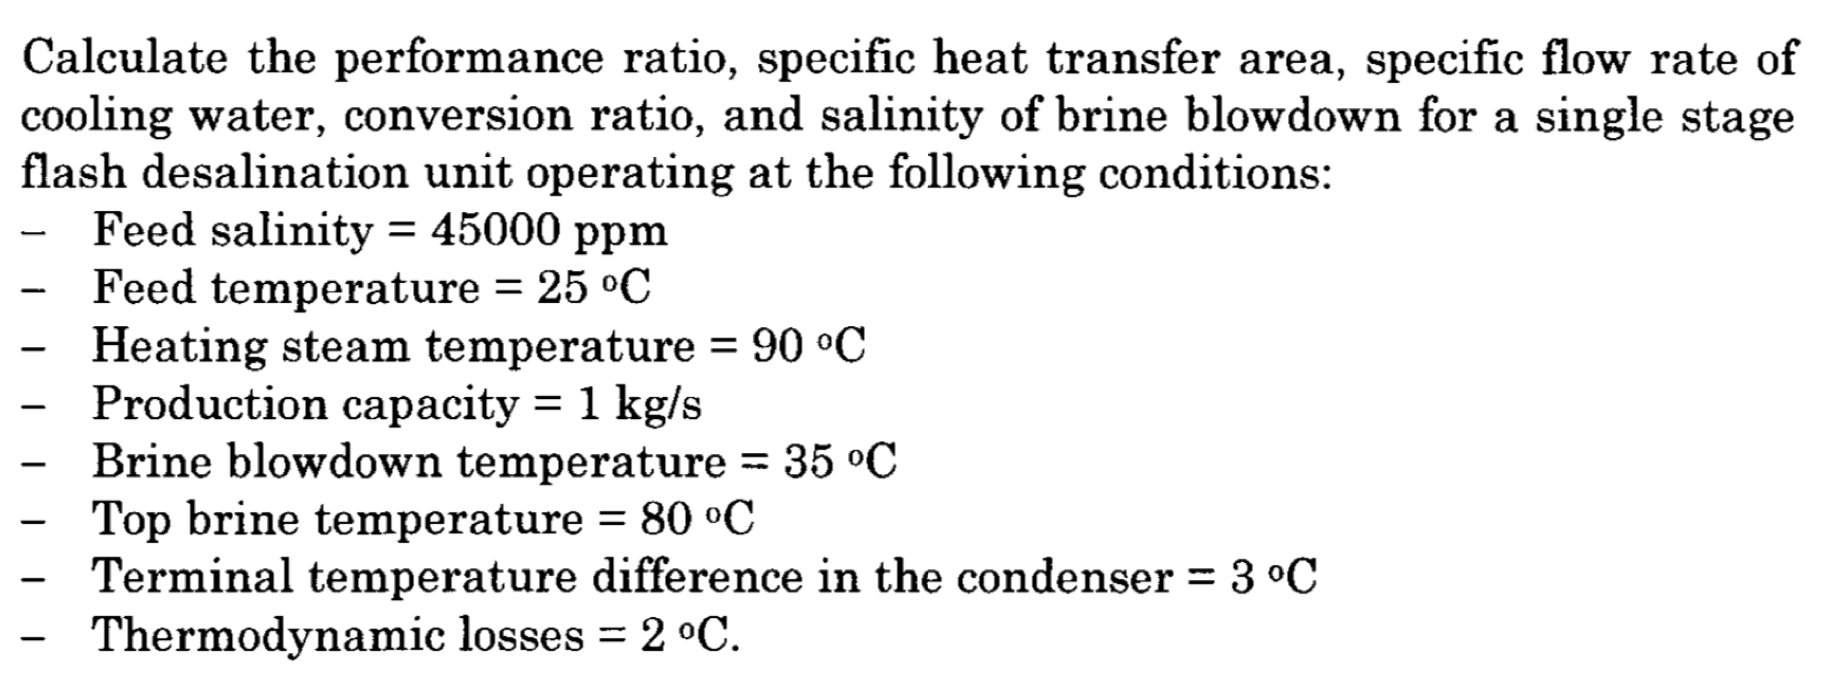

In [4]:
from IPython.display import Image
Image('images/exercise.png',width="700",height="300")

In [5]:
# known variables

Xf=42000           # PPM
Tsw=30             # C
Ts=100             # C
Md=1               # kg/s
Tb=40              # C
T0=90              # C
TTDc=3             # C
DTloss=2           # C
Cp = 4.18          # kj/(kg.C)
Uh = 2             # kj/(m2.C)
Uc = 2             # kj/(m2.C)

# Unknowns
# Mf : Mass flow rate of feed to the brine heater kg/s
# Mb : Mass flow rate of brine kg/s
# Ms : Mass of steam flow rate kg/s
# Msw: Mass flow rate of seawater intake kg/s
# Mcw: Mass flow rate of cooling seawater kg/s
# T1 : inlet Feed flow rate temperature to brine heater C

# Required to calculate:
# PR : performance ratio of the SSF unit
# Ah_sp: Specific brine heater transfer area m2/(kg/s)
# Ac_sp: Specific condenser transfer area m2/(kg/s)
# Mcw_sp: Specific cooling seawater mass flow rate kg/s
# CR : Conversion ratio
# Xb : Salinity of brine blowdown PPM

In [6]:
DTst=T0-Tb         # C
TTDh=Ts-T0         # C
Tv = Tb-DTloss     # C

print('DTst= {}\nTTDh= {}\nTv= {}'.format(DTst,TTDh,Tv))

DTst= 50
TTDh= 10
Tv= 38


In [7]:
import swp
LEMDAs=swp.LatentHeat(Ts)
LEMDAv=swp.LatentHeat(Tv)
print('LEMDAs= {}\nLEMDAv= {}'.format(LEMDAs,LEMDAv))

LEMDAs= 2257.2499153
LEMDAv= 2411.2798424059997


In [10]:
PR = LEMDAs*DTst/((DTst+DTloss+TTDc)*LEMDAv)
Ms= Md/PR
Mf_sp=LEMDAv/(Cp*DTst)
Mf=Mf_sp*Md
CR=1/Mf_sp
Mb=Mf-Md
Xb=Xf*Mf/Mb
Mcw_sp=LEMDAv/(Cp*(T0-DTst-DTloss-TTDc-Tsw))-Mf_sp
print('PR= {}\nMs= {}\nMf_sp= {}\nMf= {}\nCR= {}\nMb= {}\nXb= {}\nMcw_sp= {}'.format(PR,Ms,Mf_sp,Mf,CR,Mb,Xb,Mcw_sp))

PR= 0.8510191730786015
Ms= 1.1750616574036203
Mf_sp= 11.537224126344496
Mf= 11.537224126344496
CR= 0.08667596200342208
Mb= 10.537224126344496
Xb= 45985.86947533879
Mcw_sp= 103.83501713710048


In [11]:
from math import log

LMTDh=(DTst+DTloss+TTDc)/log((DTst+DTloss+TTDc+TTDh)/TTDh)
LMTDc=DTst/log((DTst+TTDc)/TTDc)
Ah_sp=Ms*LEMDAs/(Md*Uh*LMTDh)
Ac_sp=LEMDAv/(Uc*LMTDc)
print('Ah_sp= {}\nAc_sp= {}'.format(Ah_sp,Ac_sp))

Ah_sp= 45.13438858134476
Ac_sp= 69.24423193330843
